# Import Libraries

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report,balanced_accuracy_score,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Read Data

In [8]:
credit_df=pd.read_csv('creditcard.csv')

In [9]:
credit_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
credit_df.shape

(284807, 31)

# EDA

In [11]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [12]:
#don't remove duplicate as column values are different
credit_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [15]:
credit_df.shape

(284807, 31)

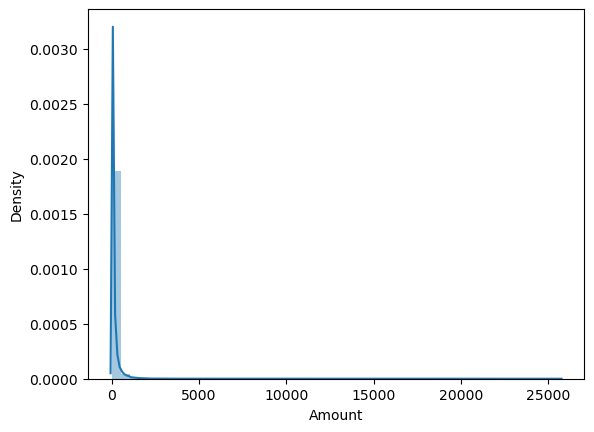

In [16]:
sns.distplot(credit_df['Amount'])
plt.show()

<Axes: xlabel='Amount', ylabel='Density'>

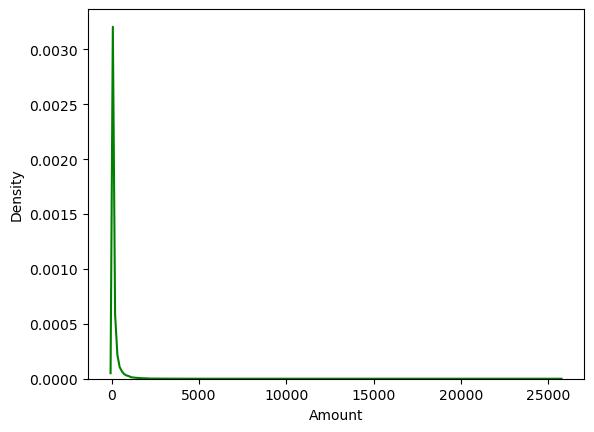

In [18]:
sns.distplot(credit_df[credit_df['Class']==0]['Amount'],hist=False,color='green')


<Axes: xlabel='Amount', ylabel='Density'>

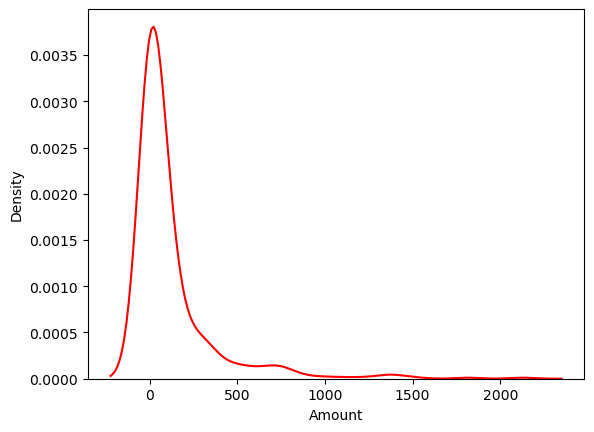

In [19]:
sns.distplot(credit_df[credit_df['Class']==1]['Amount'],hist=False,color='red')

In [22]:
#data is biased
credit_df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

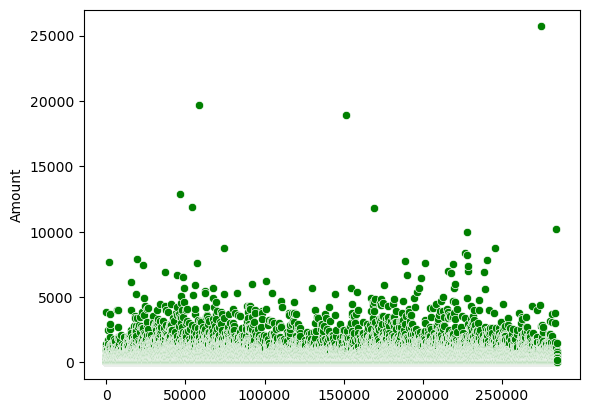

In [23]:
sns.scatterplot(credit_df[credit_df['Class']==0]['Amount'],color='green')
plt.show()

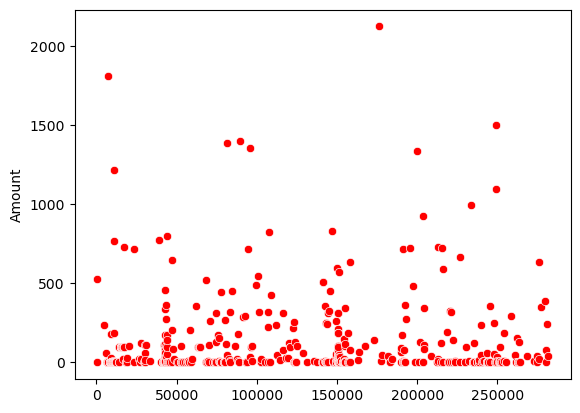

In [24]:
sns.scatterplot(credit_df[credit_df['Class']==1]['Amount'],color='red')
plt.show()

In [ ]:
Seperate fruad and normal data for ana

In [26]:
fraud_data=credit_df[credit_df['Class']==1]
normal_data=credit_df[credit_df['Class']==0]
len(fraud_data),len(normal_data)
outlier_fraction = len(fraud_data)/float(len(normal_data))
outlier_fraction

0.0017304750013189597

In [27]:
fraud_data.shape,normal_data.shape

((492, 31), (284315, 31))

In [29]:
fraud_data.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [30]:
normal_data.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

# Histogram of fraud and normal transactions

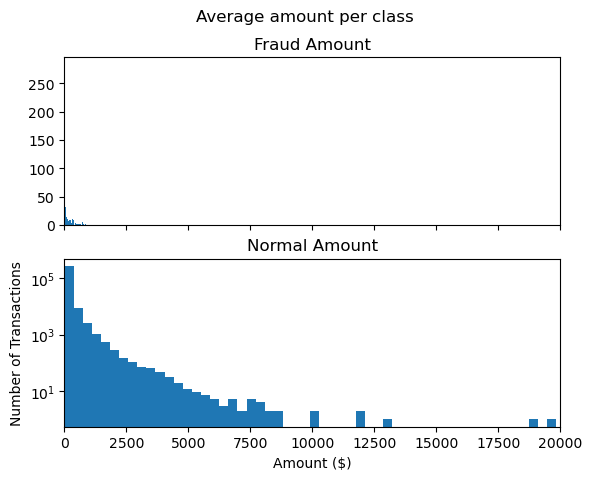

In [33]:
graph, (plot1, plot2) = plt.subplots(2,1,sharex= True)
graph.suptitle('Average amount per class')
bins = 70

plot1.hist(fraud_data.Amount, bins = bins)
plot1.set_title('Fraud Amount')

plot2.hist(normal_data.Amount , bins = bins)
plot2.set_title('Normal Amount')
plt.xlim((0, 20000))
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show();

# Heatmap

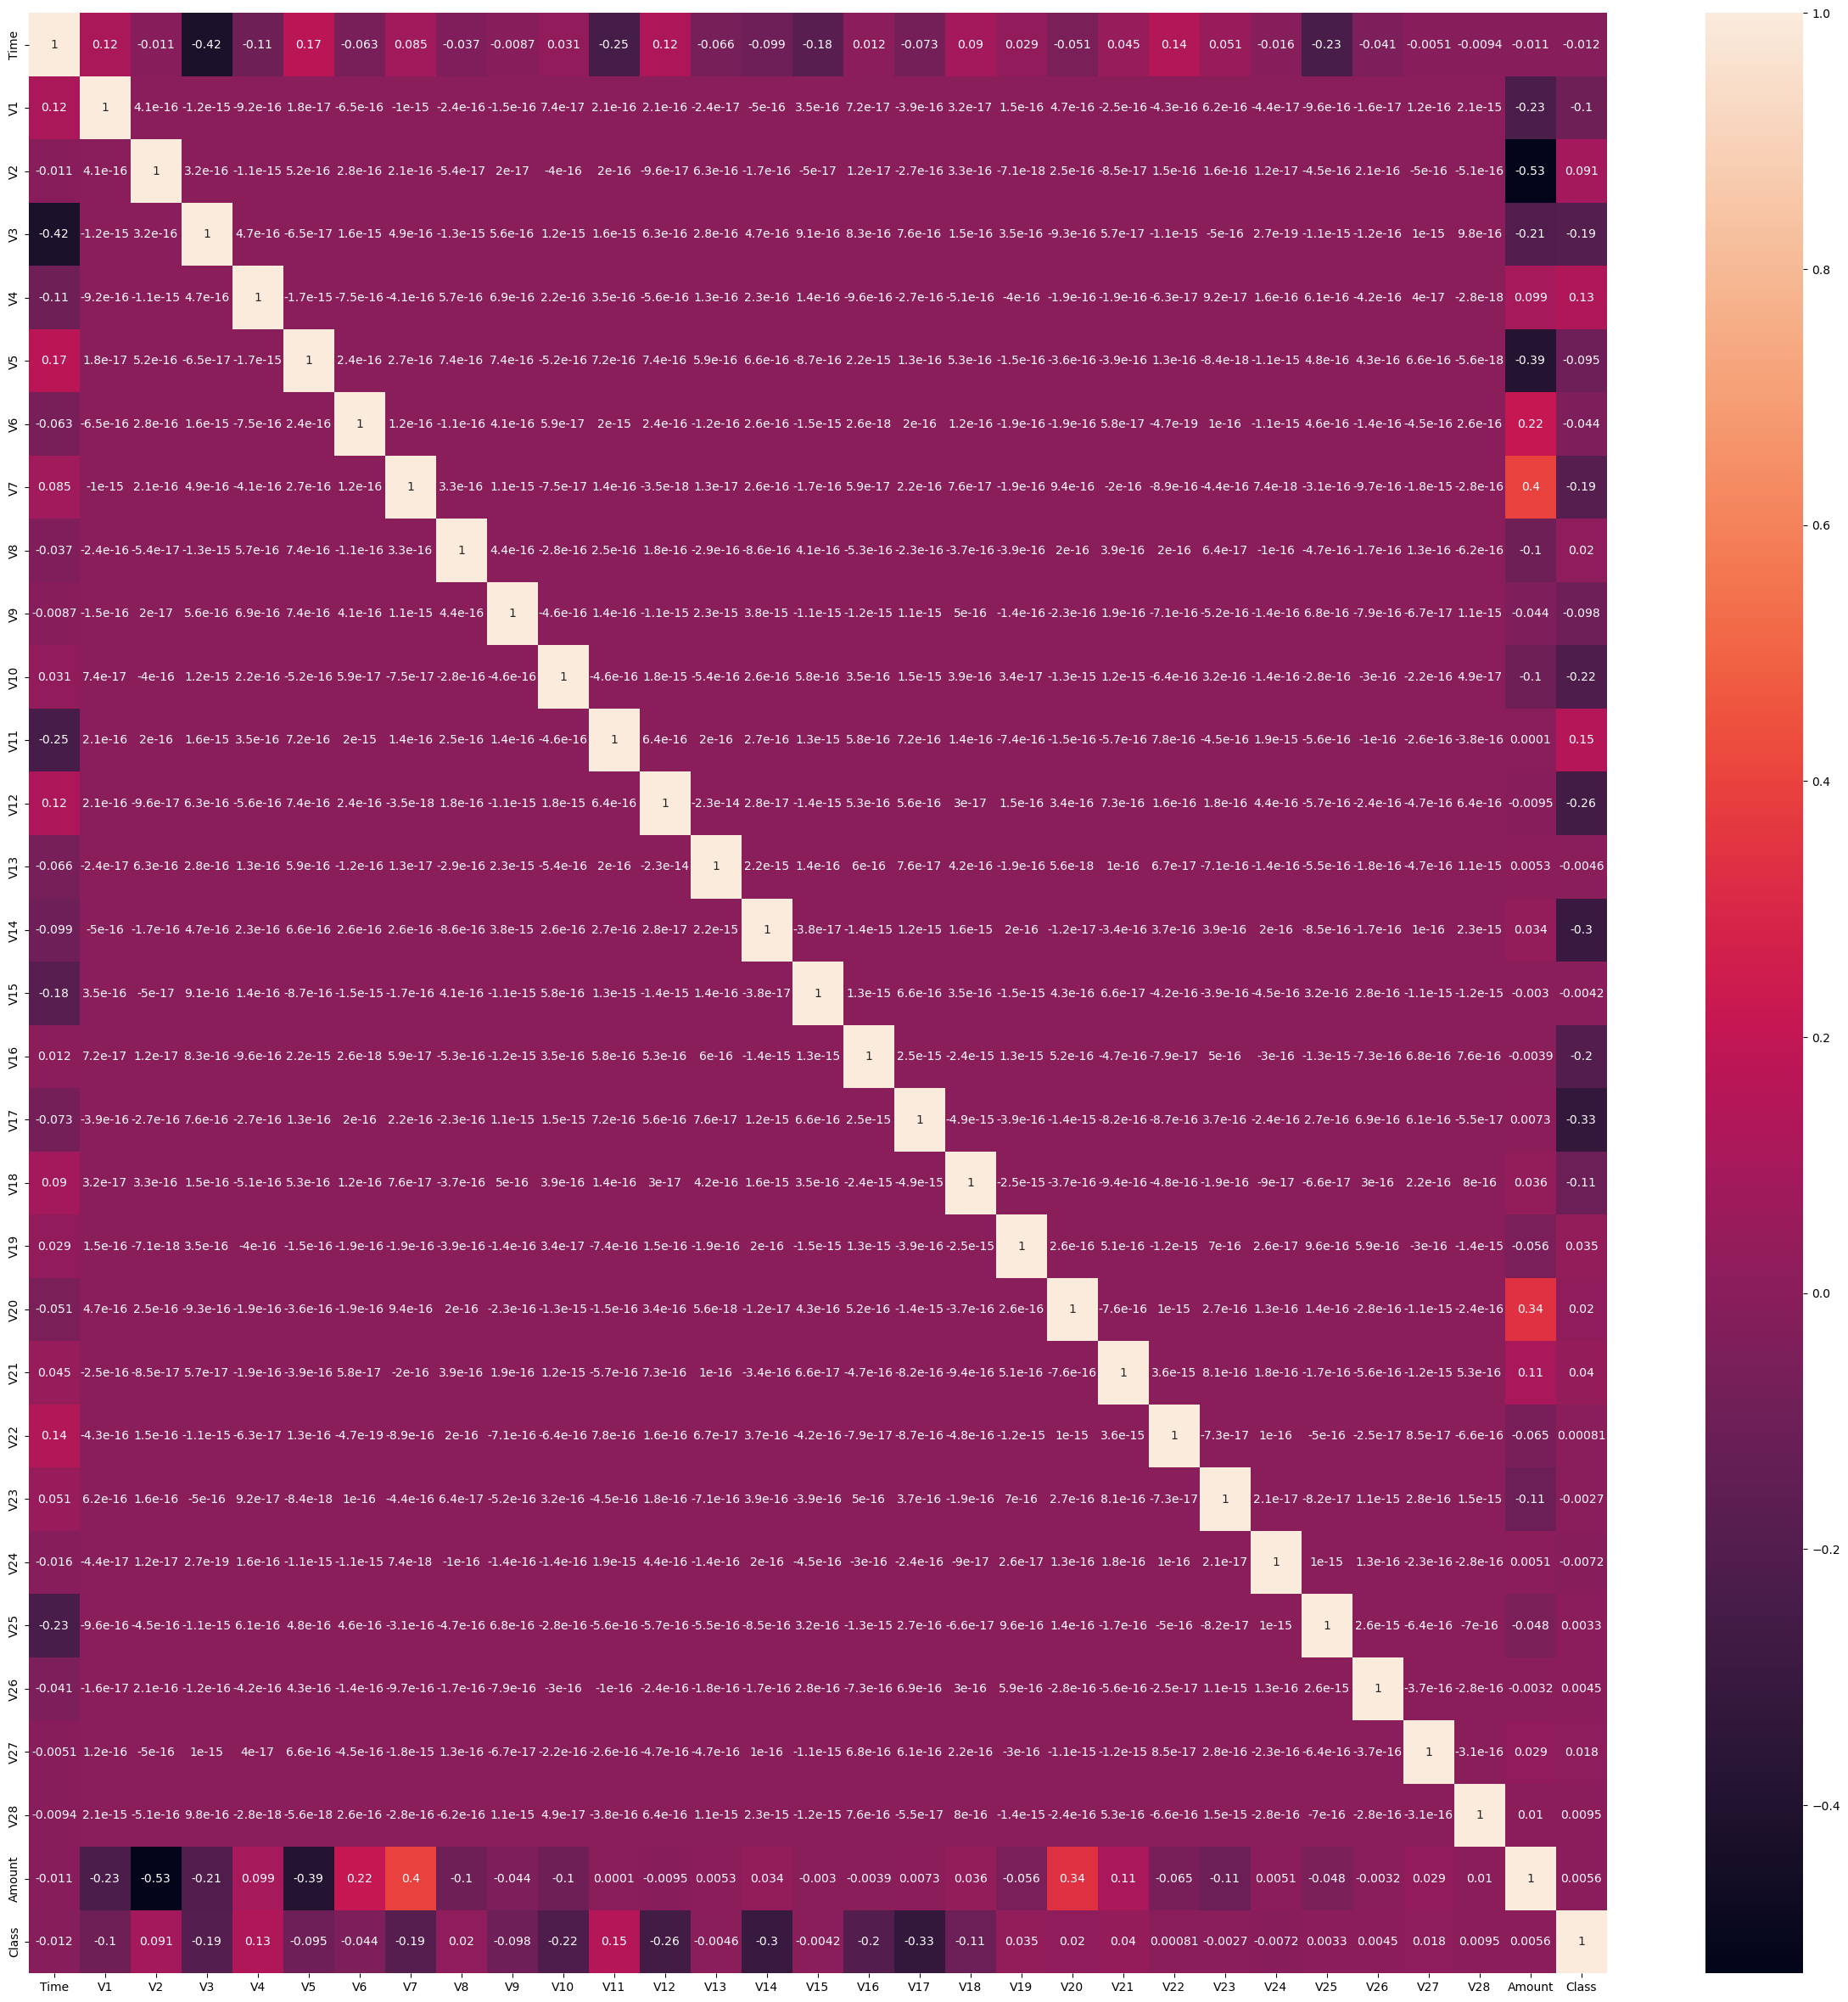

In [34]:
credit_df.corr()
plt.figure(figsize=(30,30))
g=sns.heatmap(credit_df.corr(),annot=True)

In [35]:
X = credit_df.iloc[:,0:-1]
y = credit_df.iloc[:,-1]

In [36]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [37]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [38]:
credit_df.columns.get_loc('Class')

30

In [39]:
len(y[y==1]),len(y[y==0])

(492, 284315)

# IsolationForest

In [67]:
from sklearn.ensemble import IsolationForest

In [149]:
iso_forest= IsolationForest(n_estimators=350,max_samples=len(X),contamination=outlier_fraction,
                            random_state=42, verbose=0) 

In [150]:
iso_forest.fit(X)

IsolationForest(contamination=0.0017304750013189597, max_samples=284807,
                n_estimators=350, random_state=42)

In [151]:
scores_prediction = iso_forest.decision_function(X)
y_pred = iso_forest.predict(X)

In [152]:
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
n_errors = (y_pred!= y).sum()
# Run Classification Metrics
print('n_errors',n_errors)
print("Accuracy Score :")
print(accuracy_score(y,y_pred))
print("Classification Report :")
print(classification_report(y,y_pred))
print('confusion matrix')
confusion_matrix(y,y_pred)

n_errors 663
Accuracy Score :
0.9976721077782499
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.33      0.33      0.33       492

    accuracy                           1.00    284807
   macro avg       0.66      0.66      0.66    284807
weighted avg       1.00      1.00      1.00    284807

confusion matrix


array([[283983,    332],
       [   331,    161]])

In [153]:
pd.value_counts(y_pred)

0    284314
1       493
dtype: int64

In [170]:
credit_df.Class.loc[y_pred==1].value_counts()

0    332
1    161
Name: Class, dtype: int64

In [197]:
precision=(283983/(283983+331))*100
recall=(283983/(332+283983))*100
precision,recall

(99.8835794227509, 99.8832281096671)

# Local Outlier Factor

In [78]:
from sklearn.neighbors import LocalOutlierFactor

In [79]:
model_lof = LocalOutlierFactor(n_neighbors=20, contamination=0.0014, novelty=True)
model_lof.fit(X)

LocalOutlierFactor(contamination=0.0014, novelty=True)

In [80]:
y_pred= model_lof.predict(X)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [81]:
scores_prediction = model_lof.negative_outlier_factor_

In [82]:
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
n_errors = (y_pred != y).sum()
# Run Classification Metrics
print('n_errors',n_errors)
print("Accuracy Score :")
print(accuracy_score(y,y_pred))
print("Classification Report :")
print(classification_report(y,y_pred))

n_errors 768
Accuracy Score :
0.997303437064398
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.07      0.04      0.05       492

    accuracy                           1.00    284807
   macro avg       0.53      0.52      0.53    284807
weighted avg       1.00      1.00      1.00    284807



In [96]:
confusion_matrix(y,y_pred)

array([[284018,    297],
       [   471,     21]])

# Comparing with other Classifiers

In [179]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [180]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score   
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [181]:
dtc=DecisionTreeClassifier(max_depth=10)
lrc=LogisticRegression()
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [182]:
clfs={
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'xgb':xgb
}

In [183]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [184]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  DT
Accuracy -  0.9994908886626171
Precision -  0.8767123287671232
For  LR
Accuracy -  0.9988764439450862
Precision -  0.5943396226415094
For  RF
Accuracy -  0.9996488887328394
Precision -  0.9324324324324325
For  AdaBoost
Accuracy -  0.999420666409185
Precision -  0.7931034482758621
For  xgb
Accuracy -  0.9996313331694814
Precision -  0.9315068493150684


In [185]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [186]:
performance_df

,Algorithm,Accuracy,Precision
2,RF,0.999649,0.932432
4,xgb,0.999631,0.931507
0,DT,0.999491,0.876712
3,AdaBoost,0.999421,0.793103
1,LR,0.998876,0.594340


In [199]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,RF,Accuracy,0.999649
1,xgb,Accuracy,0.999631
2,DT,Accuracy,0.999491
3,AdaBoost,Accuracy,0.999421
4,LR,Accuracy,0.998876
5,RF,Precision,0.932432
6,xgb,Precision,0.931507
7,DT,Precision,0.876712
8,AdaBoost,Precision,0.793103
9,LR,Precision,0.594340


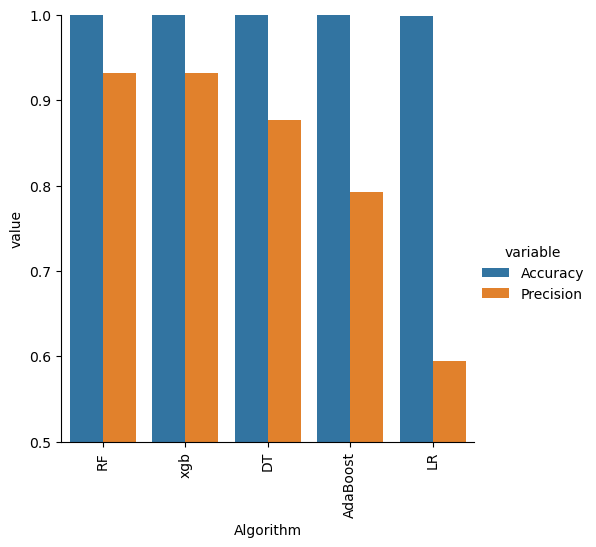

In [188]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

Observations :

Isolation Forest has 663 errors versus Local Outlier Factor has 768 errors.

Isolation Forest has accuracy of 0.9976 and LOF accuracy is 0.9973.

So overall Isolation Forest Method performed much better in determining the fraud cases and computationaly less expensive.
